In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import cv2
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load binary mask and Ground Truth to be evaluated.

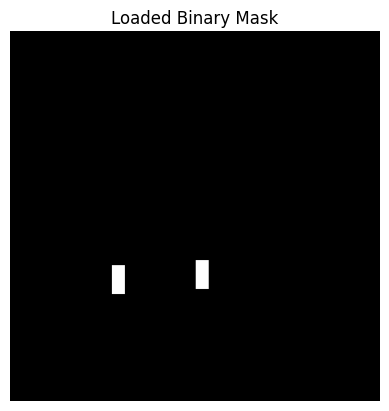

In [3]:
# Load the saved binary mask
mask_path = "/content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/001_bin.png"
loaded_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

dilate_kernel=(5, 5)
dilate_iter=2

# Dilation kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, dilate_kernel)
# Apply morphological dilation to predicted mask
pred_mask = cv2.dilate(loaded_mask, kernel, iterations=dilate_iter)
# Optional: Convert to binary (0 or 1) if needed for logic
binary_mask = (loaded_mask > 128).astype(np.uint8)

# Visualize
plt.imshow(loaded_mask, cmap='gray')
plt.title("Loaded Binary Mask")
plt.axis('off')
plt.show()

Function to evaluate Binary mask against Ground Truth.

In [23]:
def evaluate_cmfd(pred_dir, gt_dir, mask_size=(512, 512), dilate_kernel=(5, 5), dilate_iter=2):
    """
    Evaluate CMFD binary masks against ground truth, with optional dilation.

    Parameters:
    - pred_dir: directory with predicted masks (001_bin.png, etc.)
    - gt_dir: directory with ground truth masks (001_B.png, etc.)
    - mask_size: size to resize masks to, default (512, 512)
    - dilate_kernel: tuple for dilation kernel size (e.g., (5,5))
    - dilate_iter: how many times to apply dilation

    Returns:
    - avg_precision, avg_recall, avg_f1, avg_iou
    """
    precision_list = []
    recall_list = []
    f1_list = []
    iou_list = []

    # Dilation kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, dilate_kernel)

    for i in range(1, 201):  # Adjust range as needed
        file_id = f"{i:03d}"
        pred_file = os.path.join(pred_dir, f"{file_id}_bin.png")
        gt_file = os.path.join(gt_dir, f"{file_id}_B.png")

        if not os.path.exists(pred_file):
            print(f"Missing prediction: {pred_file}")
            continue
        if not os.path.exists(gt_file):
            print(f"Missing ground truth: {gt_file}")
            continue

        # Load masks
        pred_mask = cv2.imread(pred_file, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.imread(gt_file, cv2.IMREAD_GRAYSCALE)

        # Resize if needed
        if pred_mask.shape != mask_size:
            pred_mask = cv2.resize(pred_mask, mask_size, interpolation=cv2.INTER_NEAREST)
        if gt_mask.shape != mask_size:
            gt_mask = cv2.resize(gt_mask, mask_size, interpolation=cv2.INTER_NEAREST)

        # Threshold masks
        pred_mask = (pred_mask > 0).astype(np.uint8)
        gt_mask = (gt_mask > 128).astype(np.uint8)

        # Apply morphological dilation to predicted mask
        pred_mask = cv2.dilate(pred_mask, kernel, iterations=dilate_iter)

        # Flatten
        pred_flat = pred_mask.flatten()
        gt_flat = gt_mask.flatten()

        # Metrics
        precision = precision_score(gt_flat, pred_flat, zero_division=0)
        recall = recall_score(gt_flat, pred_flat, zero_division=0)
        f1 = f1_score(gt_flat, pred_flat, zero_division=0)
        intersection = np.logical_and(gt_mask, pred_mask).sum()
        union = np.logical_or(gt_mask, pred_mask).sum()
        iou = intersection / union if union != 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        iou_list.append(iou)

    # Averages
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)
    avg_iou = np.mean(iou_list)

    print("\n=== Evaluation Results with Dilation ===")
    print(f"Average Precision: {avg_precision:.3f}")
    print(f"Average Recall:    {avg_recall:.3f}")
    print(f"Average F1 Score:  {avg_f1:.3f}")
    print(f"Average IoU:       {avg_iou:.3f}")

    # After avg_precision, avg_recall, etc. are printed...

    # --- Plot per-image recall histogram ---
    bins = np.linspace(0, 1, 11)  # 0.0 to 1.0 in steps of 0.1
    bin_labels = [f"{round(bins[i], 1)}-{round(bins[i+1], 1)}" for i in range(len(bins)-1)]
    recall_hist, _ = np.histogram(f1_list, bins=bins)

    x = np.arange(len(bin_labels))

    plt.figure(figsize=(10, 6))
    plt.bar(x, recall_hist, width=0.6, color='skyblue')
    plt.xticks(x, bin_labels, rotation=45)
    plt.xlabel('F1 Score')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Per-Image IoU')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return avg_precision, avg_recall, avg_f1, avg_iou


Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/043_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/044_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/045_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/048_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/049_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/050_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/051_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/052_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/053_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/054_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/055_bin.png
Missing prediction: /content/drive/MyDrive/CoMoFoD_small_v2/binary_mask/056_

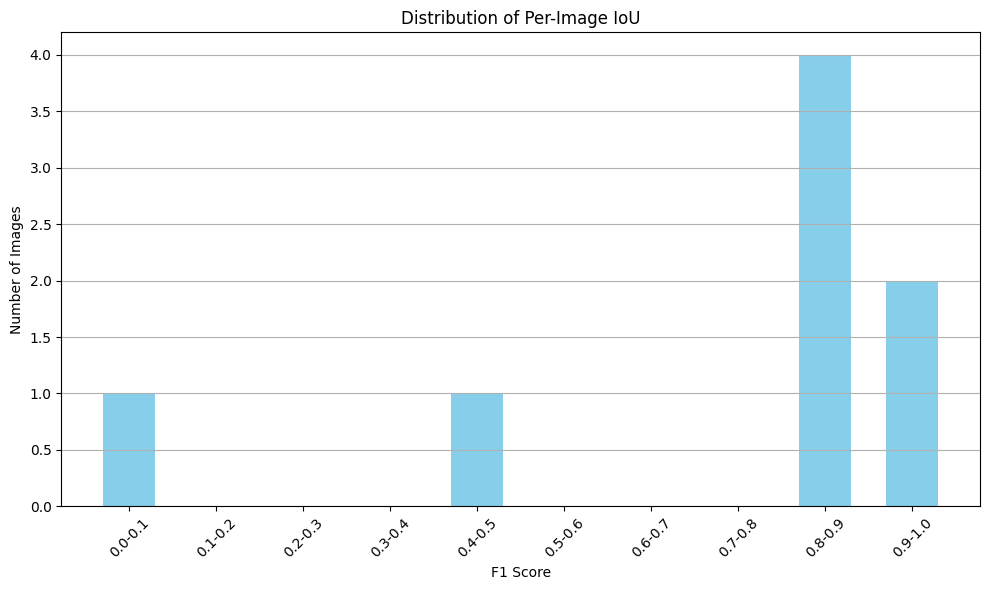

(np.float64(0.7505811222004282),
 np.float64(0.7187888205598659),
 np.float64(0.7060624927035876),
 np.float64(0.6125794979865695))

In [24]:
# === Set paths ===
pred_dir = "/content/drive/MyDrive/CoMoFoD_small_v2/binary_mask"  # your predictions
gt_dir = "/content/drive/MyDrive/CoMoFoD_small_v2"  # ground truth masks

# === Run evaluation ===
evaluate_cmfd(pred_dir, gt_dir)

